# Linear PV Estimator

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
from oedisi.componentframework import wiring_diagram_utils
from post_process import plotter

ROOT = os.getcwd()
OUTPUTS = f"{ROOT}/outputs"
SCENARIO_DIR, SCENARIOS, _ = next(os.walk(f'{ROOT}/scenario/'))

print(SCENARIO_DIR)
for idx, scenario in enumerate(SCENARIOS):
    print(idx, scenario)

/home/tylor/dev/oedisi_dopf/scenario/
0 medium_extreme
1 large
2 medium_high
3 omoo
4 medium
5 omoo_medium
6 omoo_medium_extreme
7 medium_low
8 small_low
9 small
10 lest_small
11 small_medium
12 small_high
13 small_extreme
14 lest_test
15 ieee123
16 medium_medium
17 omoo_small


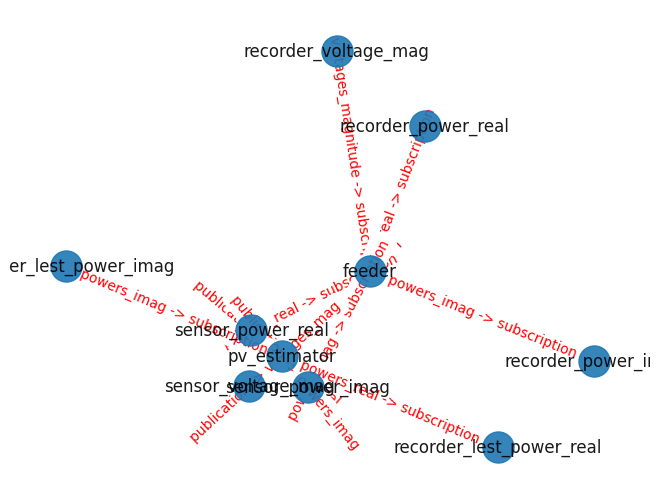

In [2]:
index = 10
SCENARIO = SCENARIOS[index]

path = f"{SCENARIO_DIR}{SCENARIO}"
with open(f"{path}/system.json") as f:
    wiring_diagram = wiring_diagram_utils.WiringDiagram.parse_obj(json.load(f))

wiring_diagram_utils.plot_graph_matplotlib(wiring_diagram)

In [4]:
os.system(f"oedisi build --system {path}/system.json --component-dict {path}/components.json --target-directory build_{SCENARIO}") 

Loading the components defined in /home/tylor/dev/oedisi_dopf/scenario/lest_small/components.json
Loading system json /home/tylor/dev/oedisi_dopf/scenario/lest_small/system.json
Building system in build_lest_small


0

In [5]:
os.system("pkill -9 helics_broker")
os.system(f"oedisi run --runner build_{SCENARIO}/system_runner.json")

[warn] helics-cli's web interface is not installed. You may want to run `pip install "helics[cli]"`.
[warn] helics-cli's observer functionality is not installed. You may want to run `pip install "helics[cli]"`.
[info] Running federation: lest_small
[info] Running federate recorder_power_real as a background process
[info] Running federate recorder_power_imag as a background process
[info] Running federate recorder_voltage_mag as a background process
[info] Running federate recorder_lest_power_real as a background process
[info] Running federate recorder_lest_power_imag as a background process
[info] Running federate feeder as a background process
[info] Running federate sensor_voltage_mag as a background process
[info] Running federate sensor_power_real as a background process
[info] Running federate sensor_power_imag as a background process
[info] Running federate pv_estimator as a background process
[info] Running federate broker as a background process
[info] Waiting for 11 processe

0

In [3]:
# Directory location
directory = f"{OUTPUTS}/{SCENARIO}"
power_real = os.path.join(directory, "power_real.feather")
power_imag = os.path.join(directory, "power_imag.feather")
power_real_est = os.path.join(directory, "lest_power_real.feather")
power_imag_est = os.path.join(directory, "lest_power_imag.feather")
time=["07:30", "12:30", "15:30"]

/home/tylor/dev/oedisi_dopf/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


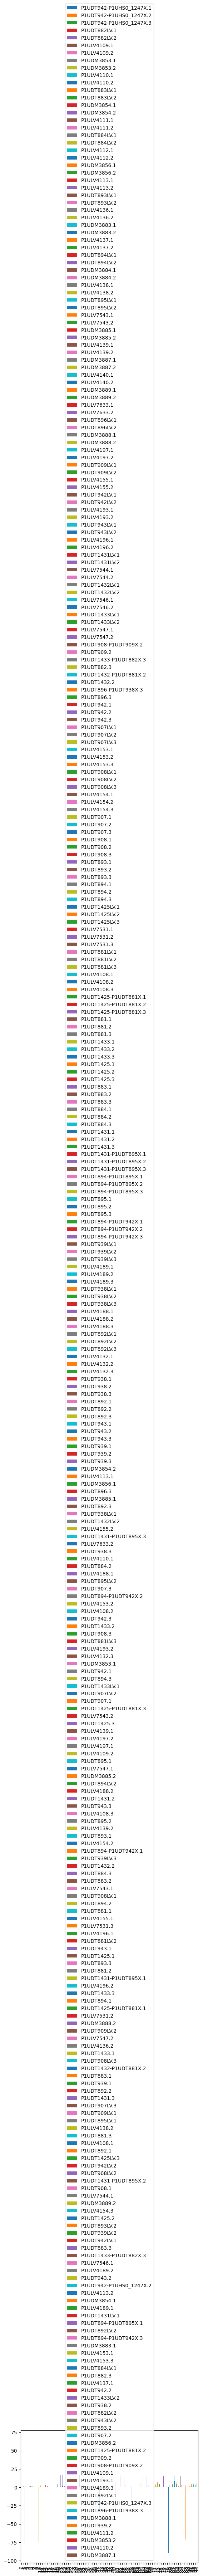

In [4]:
plotter.plot_pv_estimation(
    power_real,
    power_imag,
    power_real_est,
    power_imag_est
)